# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "sainavanessa"
kaggle_key = "d43c141bacbe3cc0f58355b922fcd2b0"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms


In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [50]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
train_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'count']]
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [11]:
predictor = TabularPredictor(label = 'count', eval_metric= 'root_mean_squared_error').fit(train_data = train[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp','atemp', 'humidity', 'windspeed', 'count']] , 
                                                  time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230604_124223/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230604_124223/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.730695      24.064249  439.768908                0.001571           0.498332            3       True         13
1   RandomForestMSE_BAG_L2  -53.402116      22.631817  384.121108                0.968725          39.074427            2       True         11
2     ExtraTreesMSE_BAG_L2  -53.656754      22.581985  356.748349                0.918893          11.701669            2       True         12
3          LightGBM_BAG_L2  -54.929354      22.175059  388.494480                0.511968          43.447800            2       True         10
4        LightGBMXT_BAG_L2  -60.278444      25.582955  432.574040                3.919863          87.527359            2       True          9
5    KNeighborsDist_BAG_L1  -84.125061       0.084856    0.087277         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.85204974884158,
  'ExtraTrees

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions})
predictions.head()

,Datetime,count
0,2011-01-20 00:00:00,24.423222
1,2011-01-20 01:00:00,42.933228
2,2011-01-20 02:00:00,46.686527
3,2011-01-20 03:00:00,48.759544
4,2011-01-20 04:00:00,51.681465


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.698120
std,90.310066
min,3.033210
25%,20.737480
50%,63.278290
75%,170.689346
max,366.373718


In [15]:
# How many negative values do we have?
negative_vals = predictions.loc[predictions['count']<0, 'count']
negative_vals

Series([], Name: count, dtype: float32)

In [16]:
# Set them to zero
replaced_vals = predictions.loc[predictions['count']<0, 'count'] = 0
replaced_vals

0

### Set predictions to submission dataframe, save, and submit

In [17]:
submission["count"] = predictions['count']
submission.to_csv("submission.csv", index=False)

In [18]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:02<00:00, 78.8kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [19]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission.csv               2023-06-04 12:53:32  first raw submission                    complete  1.80860      1.80860       
submission_new_hpo.csv       2023-06-04 11:58:15  new features with hyperparameters       complete  0.46335      0.46335       
submission_new_features.csv  2023-06-04 11:48:08  new features                            complete  0.62298      0.62298       
submission.csv               2023-06-04 11:36:25  first raw submission                    complete  1.79938      1.79938       


#### Initial score of 1.80860

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

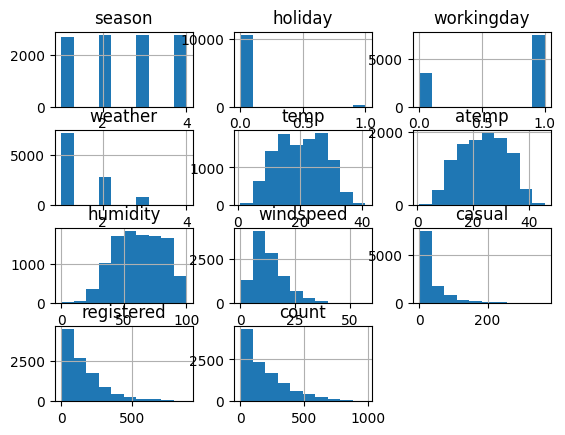

In [20]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [21]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train['year'] = train.loc[:,'datetime'].dt.year
train['month'] = train.loc[:,'datetime'].dt.month
train['day'] = train.loc[:,'datetime'].dt.day
train['hour'] = train.loc[:,'datetime'].dt.hour

test['year'] = test.loc[:,'datetime'].dt.year
test['month'] = test.loc[:,'datetime'].dt.month
test['day'] = test.loc[:,'datetime'].dt.day
test['hour'] = test.loc[:,'datetime'].dt.hour

train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

(None, None)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [22]:
train["season"] = train.loc[:,'season'].astype('category')
train["weather"] = train.loc[:,'weather'].astype('category')
test["season"] = test.loc[:, 'season'].astype('category')
test["weather"] = test.loc[:,'weather'].astype('category')

In [23]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

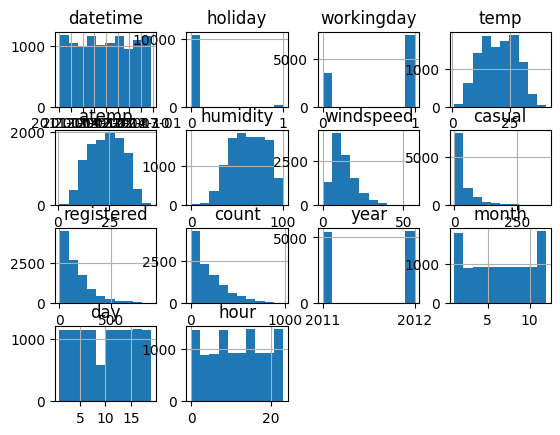

In [24]:
# View histogram of all features again now with the hour feature
train.hist()

In [48]:
train.corr()

<ipython-input-48-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,0.166862,0.019826,0.400601
year,0.012021,-0.002482,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,-0.004932,0.001800,-0.004234


## Step 5: Rerun the model with the same settings as before, just with more features

In [25]:
predictor_new_features = TabularPredictor(label = 'count', eval_metric= 'root_mean_squared_error').fit(train_data = train.drop(['casual', 'registered'], axis=1) , 
                                                  time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230604_125341/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230604_125341/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

In [26]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.348769      26.331297  577.293175                0.001004           0.343597            3       True         13
1          LightGBM_BAG_L2  -30.552710      23.946647  429.129674                0.648685          42.759722            2       True         10
2        LightGBMXT_BAG_L2  -31.153037      24.610672  438.641398                1.312709          52.271446            2       True          9
3          CatBoost_BAG_L2  -31.651038      23.596573  430.705665                0.298611          44.335714            2       True         12
4   RandomForestMSE_BAG_L2  -31.666794      24.070288  437.582695                0.772325          51.212743            2       True         11
5      WeightedEnsemble_L2  -32.265172      22.559927  371.800444         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.34599701170154,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.30612025079756,
  'CatBoost_BAG_L1': -35.55368708234648,
  'ExtraTreesM

In [27]:

predictions_new = predictor_new_features.predict(test)
predictions_new = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new})
predictions_new.head()



,Datetime,count
0,2011-01-20 00:00:00,15.446126
1,2011-01-20 01:00:00,10.790058
2,2011-01-20 02:00:00,9.936447
3,2011-01-20 03:00:00,8.846349
4,2011-01-20 04:00:00,7.730181


In [28]:
predictions_new.describe()

,count
count,6493.000000
mean,164.096756
std,146.078735
min,3.090380
25%,49.354160
50%,125.333786
75%,233.997421
max,816.653870


In [29]:
# Remember to set all negative values to zero
predictions_new[predictions_new['count']<0] = 0

In [30]:
# Same submitting predictions
submission_new_features = pd.read_csv('./sampleSubmission.csv')
submission_new_features["count"] = predictions_new['count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:02<00:00, 76.6kB/s]
Successfully submitted to Bike Sharing Demand

In [32]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-04 13:05:25  new features                            complete  0.61037      0.61037       
submission.csv               2023-06-04 12:53:32  first raw submission                    complete  1.80860      1.80860       
submission_new_hpo.csv       2023-06-04 11:58:15  new features with hyperparameters       complete  0.46335      0.46335       
submission_new_features.csv  2023-06-04 11:48:08  new features                            complete  0.62298      0.62298       


#### New Score of 0.61037

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [33]:
import autogluon.core as ag
## From autogluon documentation

gbm_options = [{'extra_trees': True, 
                'num_boost_round': 200,
                'num_leaves': 50, 
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

xt_options = {'n_estimators':200, 'ag_args': {'name_suffix': 'RMSE', 'problem_types': ['regression']}}

xgb_options = [{'objective': 'reg:squarederror', 
                'eval_metric': 'rmse', 
                'max_depth':6, 
                'n_estimators': 200, 
                'eta':.3, 
                'subsample': 1,
                'colsample_bytree': 1}]

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'XT': xt_options,
                   'XGB': xgb_options
                  }  

time_limit = 600
num_trials = 10  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', learner_kwargs={'ignored_columns': ["casual", "registered"]}, eval_metric='root_mean_squared_error').fit(train_data = train, time_limit=time_limit,
    hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, presets = 'best_quality'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230604_130526/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230604_130526/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 15
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using F

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-53.7543	 = Validation score   (-root_mean_squared_error)
	50.23s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 71.95s of the 549.35s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.9173	 = Validation score   (-root_mean_squared_error)
	76.31s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesRMSE_BAG_L1 ... Tuning model for up to 71.95s of the 472.95s of remaining time.
	No hyperparameter search space specified for ExtraTreesRMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesRMSE_BAG_L1 ...
	-38.5135	 = Validation score   (-root_mean_squared_error)
	6.54s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 71.95s of the 466.35s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-36.2615	 = Validation score   (-root_mean_squared_error)
	35.53s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-39.3959	 = Validation score   (-root_mean_squared_error)
	35.53s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 71.95s of the 395.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-33.6247	 = Validation score   (-root_mean_squared_error)
	80.79s	 = Training   runtime
	4.16s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 359.99s of the 307.0s of remaining time.
	-32.7359	 = Validation sc

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-34.0858	 = Validation score   (-root_mean_squared_error)
	41.94s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 55.13s of the 264.16s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-33.4409	 = Validation score   (-root_mean_squared_error)
	45.43s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesRMSE_BAG_L2 ... Tuning model for up to 55.13s of the 218.62s of remaining time.
	No hyperparameter search space specified for ExtraTreesRMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesRMSE_BAG_L2 ...
	-33.2933	 = Validation score   (-root_mean_squared_error)
	9.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 55.13s of the 208.63s of remaining time.


  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-33.6466	 = Validation score   (-root_mean_squared_error)
	38.35s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 55.13s of the 170.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-34.164	 = Validation score   (-root_mean_squared_error)
	53.89s	 = Training   runtime
	0.67s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 108.85s of remaining time.
	-33.0206	 = Validation score   (-root_mean_squared_error)
	0.41s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 491.62s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPr

In [34]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L2 -32.735909       4.160898  199.862461                0.001444           0.701333            2       True          7
1     WeightedEnsemble_L3 -33.020611       4.164514  420.964882                0.001430           0.414480            3       True         13
2   ExtraTreesRMSE_BAG_L2 -33.293291       4.160177  294.823462                0.000371           9.896128            2       True         10
3      LightGBM_BAG_L2/T1 -33.440868       4.162319  330.358211                0.002512          45.430876            2       True          9
4    LightGBMLarge_BAG_L1 -33.624729       4.157357   80.788956                4.157357          80.788956            1       True          6
5       XGBoost_BAG_L2/T1 -33.646597       4.159996  323.278873                0.00018

{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesRMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'ExtraTreesRMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1/T1': -53.7543191256861,
  'LightGBM_BAG_L1/T1': -33.91733862651761,
  'ExtraTreesRMSE_BAG_L1': -38.51353515672427,
  'XGBoost_BAG_L1/T1': -36.261482419601805,
  'XGBoost_BAG_L1/T2': -39.39594719451906,
  'LightGBMLarge_BAG_L1': -33.62472876750224,
 

In [35]:
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo = pd.DataFrame({'Datetime': test['datetime'], 'count':predictions_new_hpo})
predictions_new_hpo.head()


,Datetime,count
0,2011-01-20 00:00:00,14.434856
1,2011-01-20 01:00:00,0.198966
2,2011-01-20 02:00:00,-1.999637
3,2011-01-20 03:00:00,1.979958
4,2011-01-20 04:00:00,1.884333


In [36]:
predictions_new_hpo.describe()

,count
count,6493.000000
mean,193.084747
std,173.711487
min,-10.455249
25%,47.539604
50%,152.880432
75%,284.723114
max,897.420898


In [37]:
# Remember to set all negative values to zero
predictions_new_hpo[predictions_new_hpo['count']<0] = 0
predictions_new_hpo.describe()

,count
count,6493.000000
mean,193.105255
std,173.688477
min,0.000000
25%,47.539604
50%,152.880432
75%,284.723114
max,897.420898


In [38]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('./submission_new_features.csv')
submission_new_hpo["count"] = predictions_new_hpo['count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [39]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:02<00:00, 76.5kB/s]
Successfully submitted to Bike Sharing Demand

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-04 13:14:12  new features with hyperparameters       complete  0.51132      0.51132       
submission_new_features.csv  2023-06-04 13:05:25  new features                            complete  0.61037      0.61037       
submission.csv               2023-06-04 12:53:32  first raw submission                    complete  1.80860      1.80860       
submission_new_hpo.csv       2023-06-04 11:58:15  new features with hyperparameters       complete  0.46335      0.46335       


#### New Score of 0.46335

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

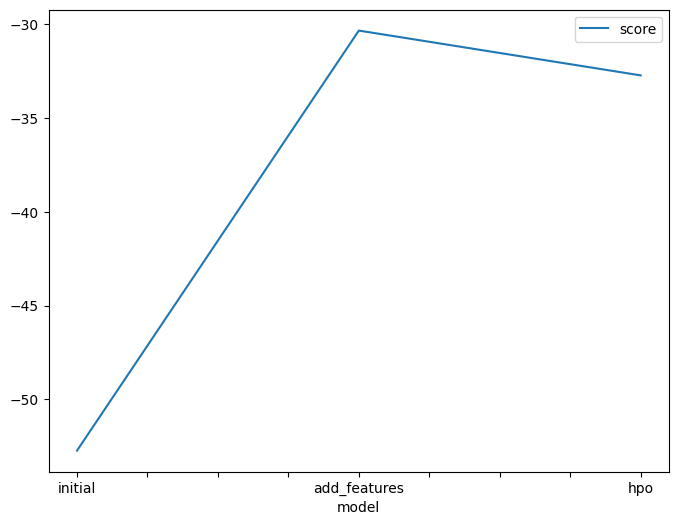

In [44]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.730695, -30.348769, -32.735909 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

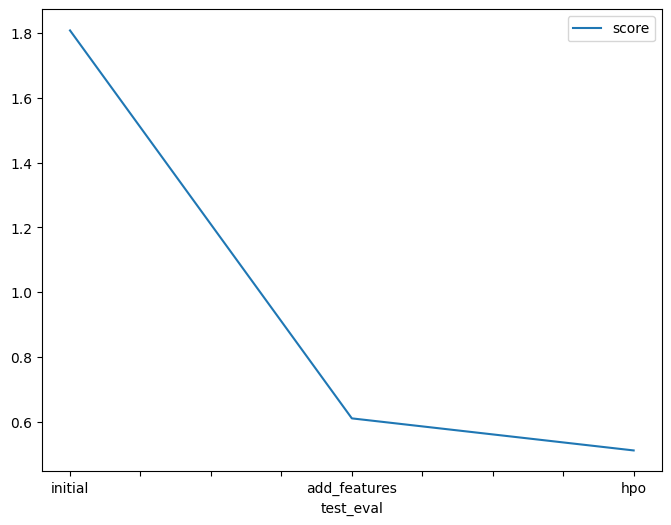

In [45]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [ 1.80860 , 0.61037, 0.51132]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [47]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "gbm": ["Default", "Default", " num_boost_round = 200, num_leaves = 50 "],
    "xt": ["Default", "Default", "'n_estimators':200, 'ag_args': {'name_suffix': 'RMSE', 'problem_types': ['regression']"],
    "xgb": ["Default", "Default", "'objective': 'reg:squarederror', 'eval_metric': 'rmse','max_depth':6, 'n_estimators': 200"],
    "score": [1.80860 , 0.61037, 0.51132]
})

,model,gbm,xt,xgb,score
0,initial,Default,Default,Default,1.80860
1,add_features,Default,Default,Default,0.61037
2,hpo,"num_boost_round = 200, num_leaves = 50","'n_estimators':200, 'ag_args': {'name_suffix':...","'objective': 'reg:squarederror', 'eval_metric'...",0.51132
